In [1]:
! pip install pandas

For an interview focused on geochemistry and anomaly detection, you might receive various types of datasets. 


Here are some examples of the data you could be sent and what each type can be used for:

### 1. **Geochemical Data**
   - **Description:** Contains measurements of different elements or compounds in rock or soil samples. Data might include concentrations of metals, minerals, or other geochemical markers.
   - **Example Data:**
     - Element concentrations (e.g., Cu, Au, Zn, Pb)
     - Sample locations (coordinates)
     - Depth of sample
     - Sample identifiers

   - **Use Cases:**
     - Identify patterns or trends in the concentration of elements.
     - Detect anomalies indicating potential ore deposits.

### 2. **Hyperspectral Data**
   - **Description:** Contains information from sensors that measure light across a range of wavelengths, providing detailed spectral information about the surface materials.
   - **Example Data:**
     - Spectral reflectance values at various wavelengths for each pixel
     - Images of the study area with spectral data

   - **Use Cases:**
     - Classify materials based on their spectral signature.
     - Detect and map mineralogical features.

### 3. **Drill Core Data**
   - **Description:** Includes data from drilling operations, such as core samples with measurements of different geological attributes.
   - **Example Data:**
     - Core sample depth intervals
     - Mineralogy and geochemistry of each interval
     - Structural data (e.g., fractures, veining)

   - **Use Cases:**
     - Analyze the distribution of minerals and their association with geological structures.
     - Model ore deposit distribution.

### 4. **Geophysical Data**
   - **Description:** Includes measurements from geophysical surveys, such as magnetic, gravity, or electromagnetic surveys.
   - **Example Data:**
     - Magnetic intensity measurements
     - Gravity anomalies
     - Electromagnetic conductivity values

   - **Use Cases:**
     - Interpret subsurface geological structures.
     - Integrate with geochemical data to identify target areas.

### 5. **Geological Mapping Data**
   - **Description:** Contains geological maps with different rock types, faults, and other geological features.
   - **Example Data:**
     - Rock types and their spatial distribution
     - Fault lines and structural features
     - Geological units

   - **Use Cases:**
     - Correlate geological features with geochemical anomalies.
     - Assess the geological context of the data.

### 6. **Time-Series Data**
   - **Description:** Measurements taken over time to observe changes in geochemical or geophysical parameters.
   - **Example Data:**
     - Temporal changes in element concentrations
     - Variations in spectral data over time

   - **Use Cases:**
     - Analyze trends and temporal anomalies.
     - Study the effects of external factors (e.g., mining activities) on geochemical data.

### 7. **Annotated Data**
   - **Description:** Data with known labels or classifications, such as areas known to have high mineralization.
   - **Example Data:**
     - Labels indicating high-grade ore zones
     - Annotations of known anomalies or deposits

   - **Use Cases:**
     - Train and test machine learning models for classification or anomaly detection.
     - Validate predictions and findings with known data.

### What to Do with the Data
- **Exploration and Visualization:** Start by exploring the dataset to understand its structure. Use visualizations like histograms, scatter plots, or maps to get a sense of the data distribution and identify initial patterns or anomalies.
- **Preprocessing:** Clean the data by handling missing values, outliers, and normalizing or standardizing if needed.
- **Analysis:** Apply statistical methods or machine learning techniques to detect patterns, correlations, or anomalies. Techniques could include PCA, clustering, regression, or anomaly detection algorithms.
- **Validation:** Cross-check your findings with known geological information or use statistical validation methods.


### 1. **Geochemical Data**

Data:A sample (generated randomly), includes depth and many mineral concentration
Problem: find the depth of differet mineral deposits, and anomaly detection. Best depth for sulfide, LI, , and Ni.

Workflow:

1: cleaning


2:plot

3:statistical analysis

3:Anomaly detection

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
! pip install seaborn

In [58]:
path_data_Geochem=r"C:\Repos\Data\ML_repo_geo\geochemicaldata.csv"

In [127]:
data_Geochem=pd.read_csv(path_data_Geochem)
data_Geochem=data_Geochem[['DEPTH','CTS', 'CTNI','CTCU','CTNA', 'CTZN','CTK','CTMG']].iloc[1:1000]
data_Geochem['X']= np.random.uniform(low=0, high=100, size=len(data_Geochem))
data_Geochem['Y']= np.random.uniform(low=0, high=100, size=len(data_Geochem))

In [129]:
data_Geochem

DEPTH     CTS    CTNI    CTCU    CTNA    CTZN      CTK    CTMG  \
1    0.0384  0.5857  2.9899  0.9230  0.0901  1.3598   1.2612  0.7006   
2    0.0466  0.5614  5.0657  1.7284  0.5727  2.4880   4.2477  1.2536   
3    0.0565  0.6006  4.2609  1.8098  0.2351  2.2978   4.0530  1.0790   
4    0.0679  0.3762  7.5326  2.2492  0.1401  1.4433   4.0882  1.7773   
5    0.0779  0.7198  8.1145  1.5669  0.6601  2.5288   7.6728  1.3689   
..      ...     ...     ...     ...     ...     ...      ...     ...   
995  0.3298  1.0373  5.8177  2.0378  0.6824  3.0631  10.2840  0.3886   
996  0.3403  0.3355  6.4186  3.0951  0.1926  1.9318  10.3329  0.5281   
997  0.3515  0.7252  8.4444  4.2446  0.1511  2.2715  15.0748  0.9410   
998  0.3616  1.0997  5.7140  3.4634  0.3436  2.2004   6.8260  0.5638   
999  0.3721  0.3898  8.5160  2.4618  0.6213  3.8994   8.9044  0.8177   

             X          Y  
1    65.662195  39.564682  
2    91.885205  62.455864  
3    40.059537  96.297594  
4    19.234316  83.153497  
5    27.072276  46.355222  
..         ...        ...  
995  46.873353  63.018557  
996  39.865929  80.375495  
997  13.688032  45.200829  
998  68.760143  51.909173  
999  99.290349  81.040194  

[999 rows x 10 columns]

In [106]:
### Create your own data
import pandas as pd
import numpy as np

# Parameters for data generation
num_samples = 1000

# Generate random data with potential signals
np.random.seed(42)  # For reproducibility
data = {
    'element1': np.random.normal(loc=10, scale=2, size=num_samples),
    'element2': np.random.normal(loc=20, scale=3, size=num_samples),
    'element3': np.random.normal(loc=30, scale=4, size=num_samples),
    'element4': np.random.normal(loc=40, scale=5, size=num_samples),
    'element5': np.random.normal(loc=50, scale=6, size=num_samples),
    'concentration': np.concatenate([np.random.normal(loc=100, scale=20, size=num_samples//2),
                                      np.random.normal(loc=200, scale=20, size=num_samples//2)]),  # Create a signal
    'longitude': np.random.uniform(low=-180, high=180, size=num_samples),
    'latitude': np.random.uniform(low=-90, high=90, size=num_samples),
}

df = pd.DataFrame(data)


In [177]:
data_Geochem.dropna(inplace=True)
data_Geochem.drop_duplicates(inplace=True)

# Normalize/Standardize features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_columns = ['CTS', 'CTNI', 'CTCU', 'CTNA', 'CTZN', 'CTK', 'CTMG']
features = data_Geochem[['CTS','CTNI','CTCU','CTNA','CTZN','CTK','CTMG']]
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=feature_columns)


In [178]:
other_columns = data_Geochem.drop(columns=feature_columns)

# Concatenate the scaled features with other columns
final_df = pd.concat([other_columns.reset_index(drop=True), scaled_features_df.reset_index(drop=True)], axis=1)

# Check the resulting DataFrame
print(final_df.head())

    DEPTH          X          Y       CTS      CTNI      CTCU      CTNA  \
0  0.0384  65.662195  39.564682 -0.647791 -2.304421 -0.670898 -1.116867   
1  0.0466  91.885205  62.455864 -0.663122 -1.099324 -0.507317  0.753021   
2  0.0565  40.059537  96.297594 -0.638391 -1.566547 -0.490785 -0.555048   
3  0.0679  19.234316  83.153497 -0.779967  0.332825 -0.401540 -0.923137   
4  0.0779  27.072276  46.355222 -0.563186  0.670645 -0.540119  1.091663   

       CTZN       CTK      CTMG  
0 -1.044801 -1.467055  0.089616  
1 -0.242785 -0.939642  1.747389  
2 -0.377994 -0.974025  1.223976  
3 -0.985443 -0.967809  3.317327  
4 -0.213781 -0.334772  2.093033  


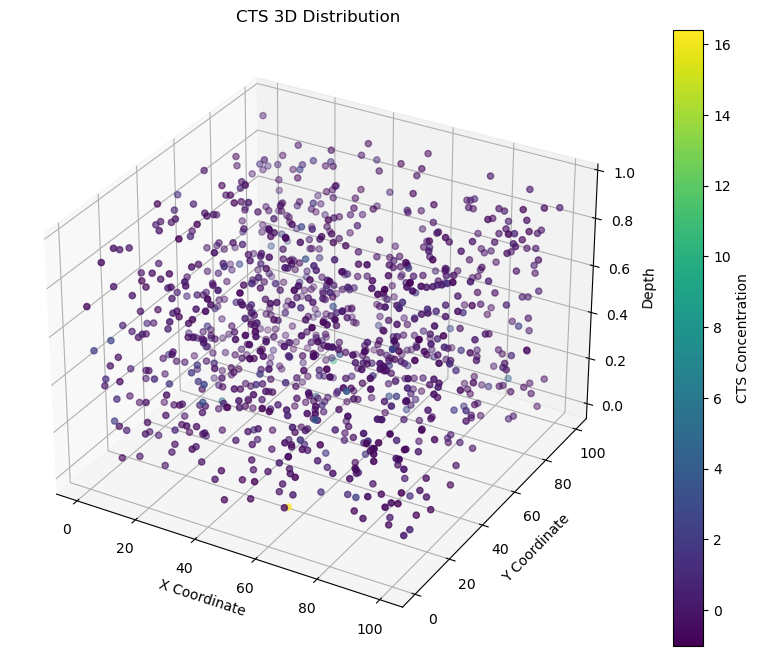

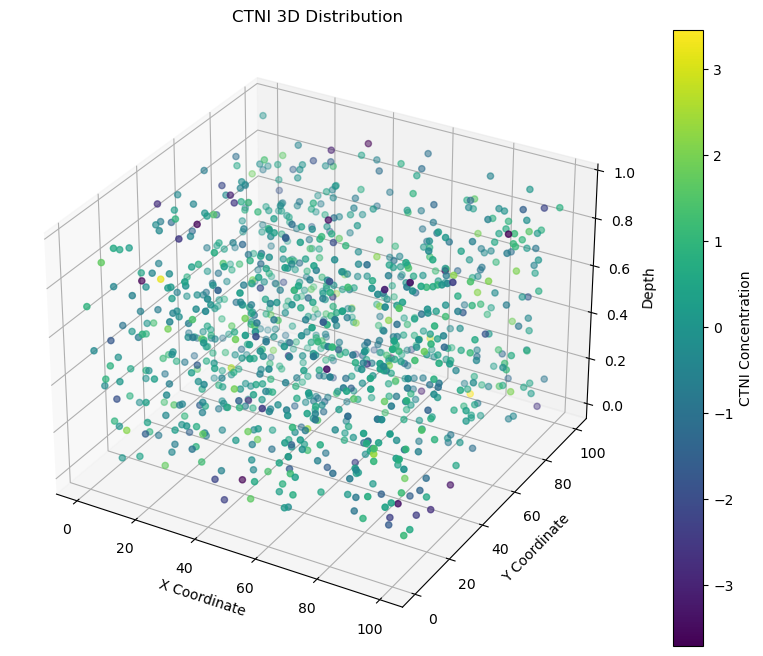

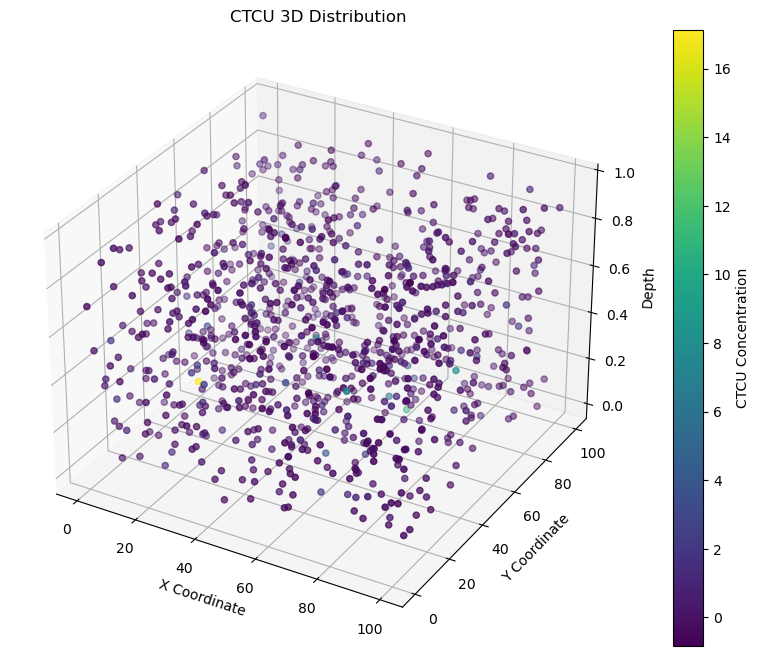

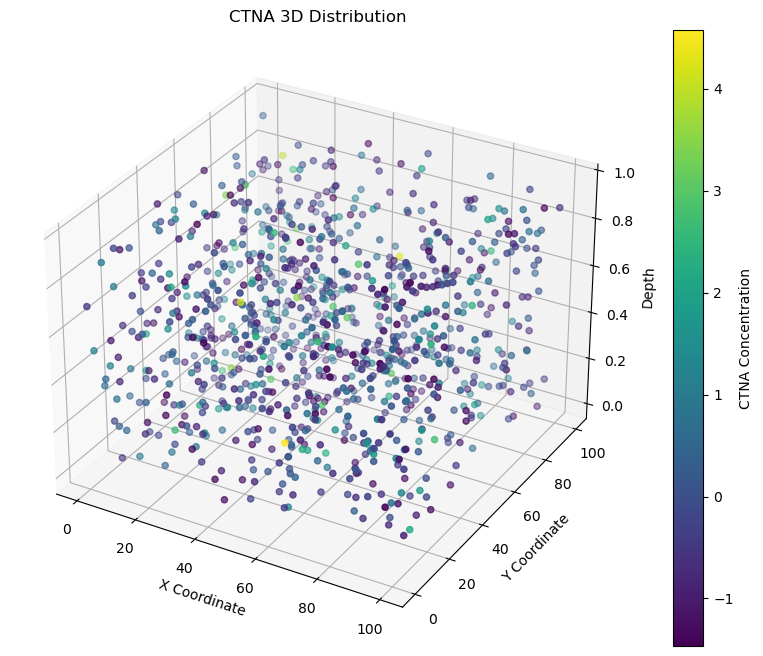

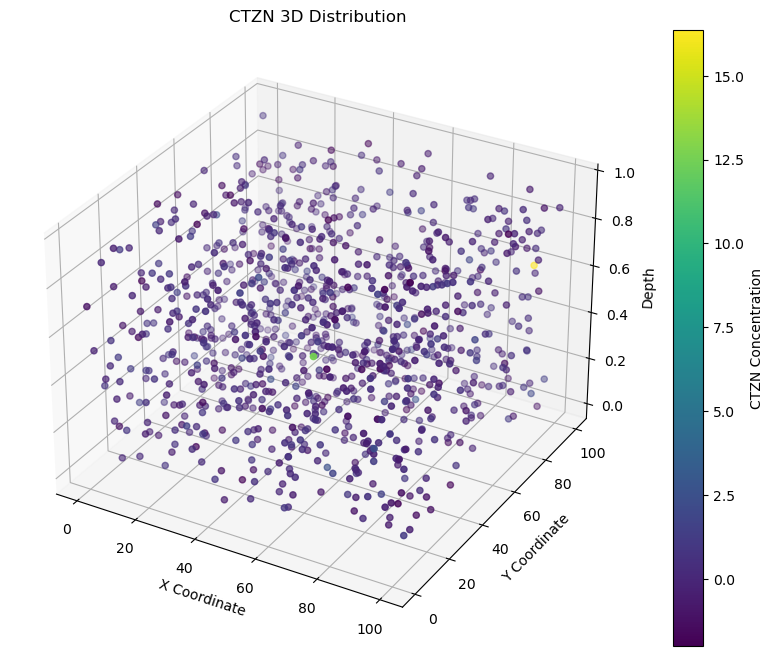

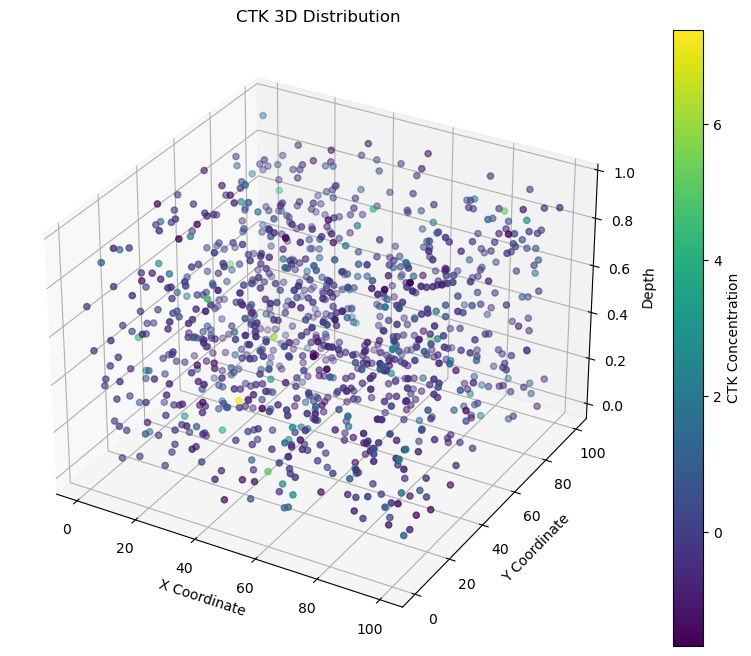

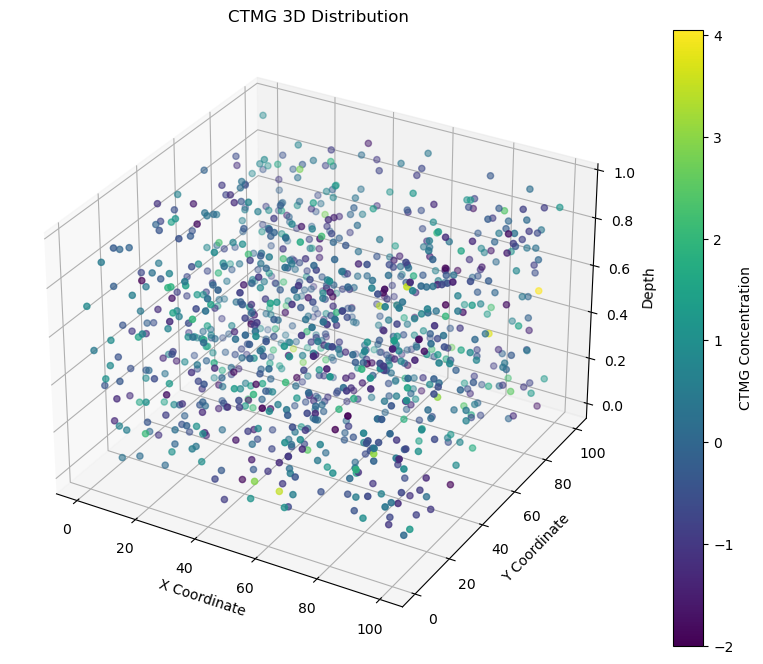

In [159]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plots for each mineral
for mineral in minerals:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(final_df['X'], final_df['Y'], final_df['DEPTH'], c=final_df[mineral], cmap='viridis', s=20)
    plt.colorbar(scatter, label=f'{mineral} Concentration')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Depth')
    ax.set_title(f'{mineral} 3D Distribution')
    plt.show()


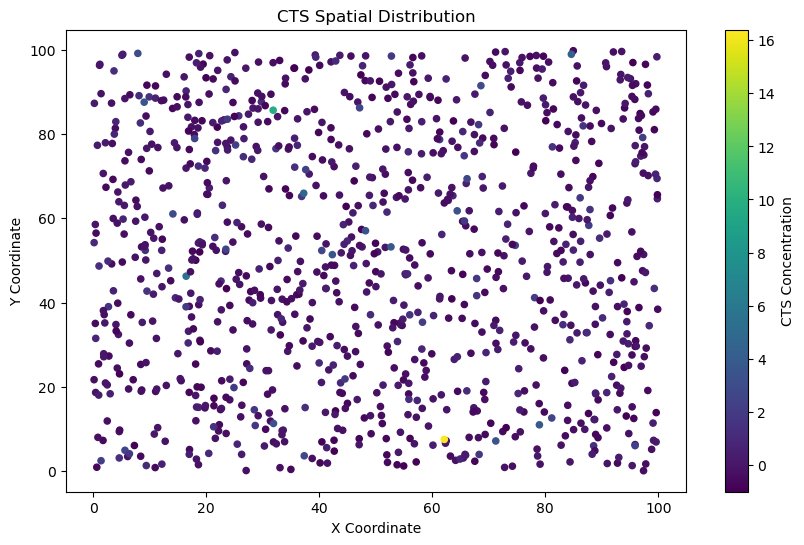

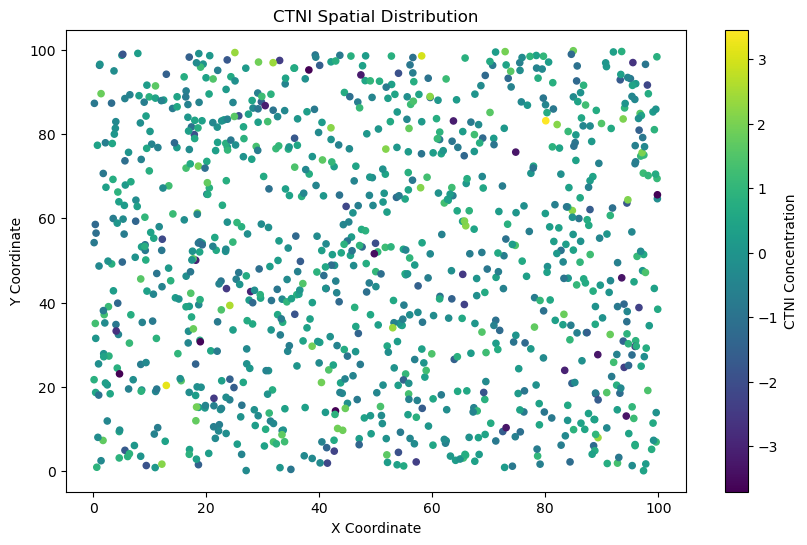

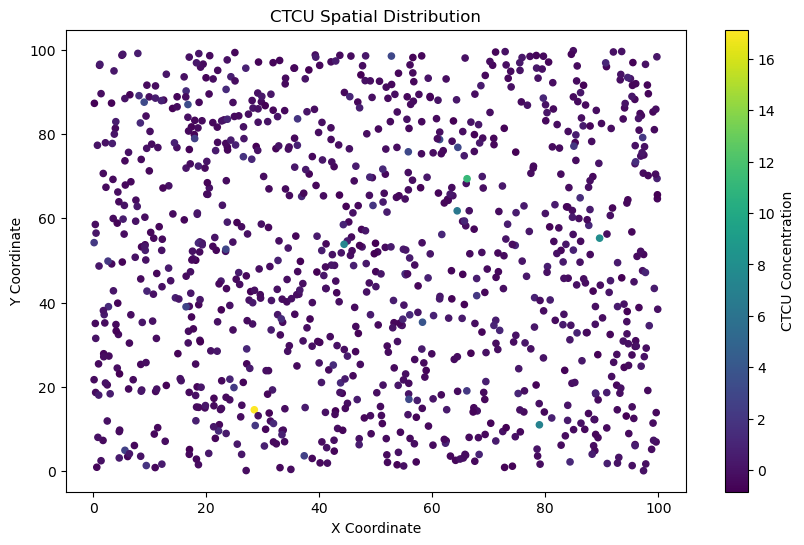

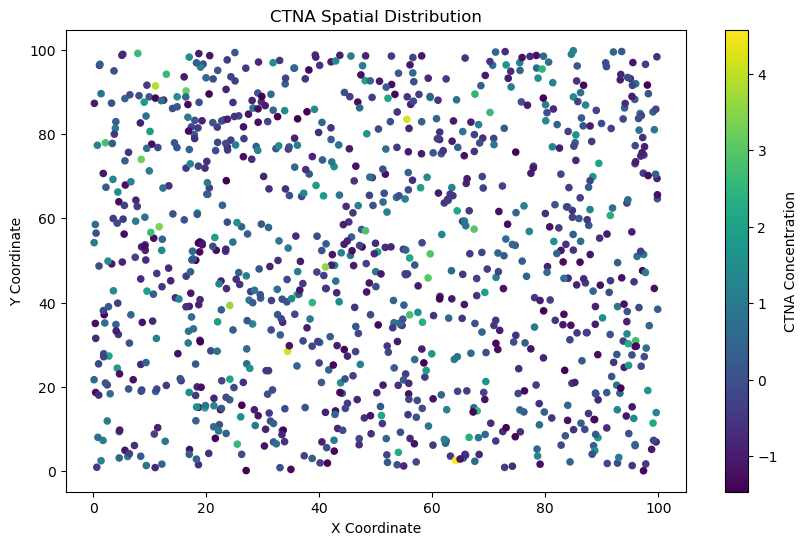

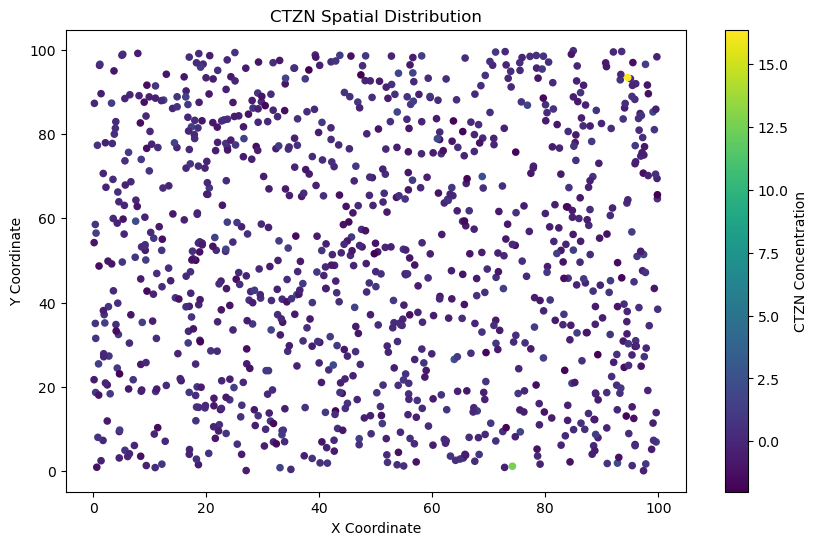

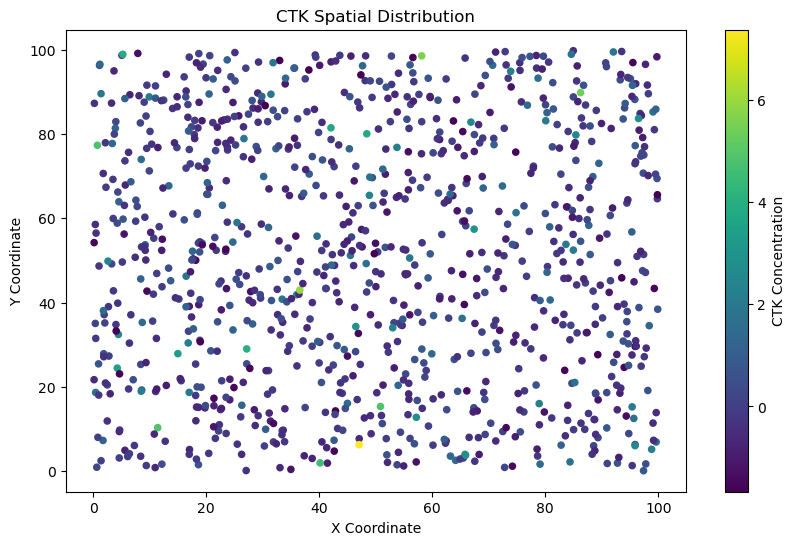

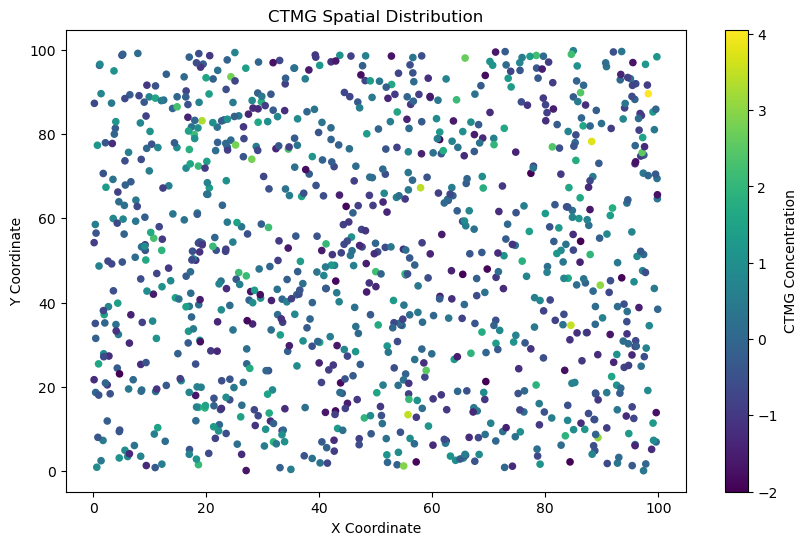

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_file.csv' with your actual file)

# List of minerals
minerals = ['CTS', 'CTNI', 'CTCU', 'CTNA', 'CTZN', 'CTK', 'CTMG']

# Create scatter plots for each mineral
for mineral in minerals:
    plt.figure(figsize=(10, 6))
    plt.scatter(final_df['X'], final_df['Y'], c=final_df[mineral], cmap='viridis', s=20)
    plt.colorbar(label=f'{mineral} Concentration')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{mineral} Spatial Distribution')
    plt.show()


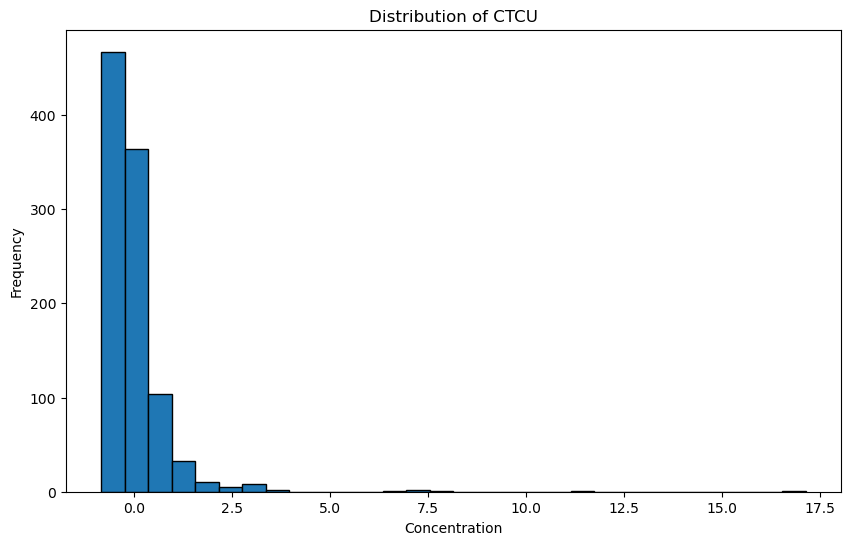

In [161]:
import matplotlib.pyplot as plt

# Histogram of concentrations
plt.figure(figsize=(10, 6))
plt.hist(final_df['CTCU'], bins=30, edgecolor='black')
plt.title('Distribution of CTCU')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()


In [179]:
import pandas as pd
from scipy.stats import zscore

# Sample data creation (replace this with actual data loading if necessary)
# final_df = pd.read_csv('your_file.csv') # Uncomment and modify if you're reading from a CSV file

# Calculate Z-scores for each feature
z_scores = final_df[feature_columns].apply(zscore)

# Define the threshold for anomalies
threshold = 3  # Common threshold is 3 standard deviations

# Identify anomalies
anomalies = (z_scores.abs() > threshold).any(axis=1)

# Add anomaly detection result to the DataFrame
final_df['Anomaly'] = anomalies

# Display the first few rows including anomalies
print(final_df.head())

# Optionally, display only the anomalies
print(final_df[final_df['Anomaly']])


    DEPTH          X          Y       CTS      CTNI      CTCU      CTNA  \
0  0.0384  65.662195  39.564682 -0.647791 -2.304421 -0.670898 -1.116867   
1  0.0466  91.885205  62.455864 -0.663122 -1.099324 -0.507317  0.753021   
2  0.0565  40.059537  96.297594 -0.638391 -1.566547 -0.490785 -0.555048   
3  0.0679  19.234316  83.153497 -0.779967  0.332825 -0.401540 -0.923137   
4  0.0779  27.072276  46.355222 -0.563186  0.670645 -0.540119  1.091663   

       CTZN       CTK      CTMG  Anomaly  
0 -1.044801 -1.467055  0.089616    False  
1 -0.242785 -0.939642  1.747389    False  
2 -0.377994 -0.974025  1.223976    False  
3 -0.985443 -0.967809  3.317327     True  
4 -0.213781 -0.334772  2.093033    False  
      DEPTH          X          Y       CTS      CTNI      CTCU      CTNA  \
3    0.0679  19.234316  83.153497 -0.779967  0.332825 -0.401540 -0.923137   
8    0.1200  14.963672  27.906028 -0.035682  0.970148 -0.643479 -1.252479   
10   0.1389  27.849200  42.628091 -0.740914 -3.023020 -0.697

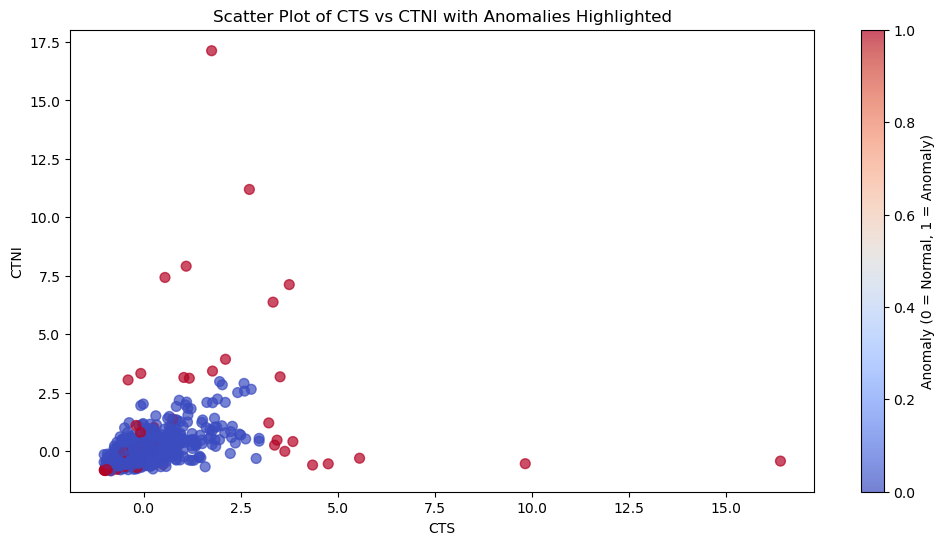

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of a pair of features, e.g., 'CTS' vs 'CTNI'
plt.figure(figsize=(12, 6))
plt.scatter(final_df['CTS'], final_df['CTCU'], c=final_df['Anomaly'], cmap='coolwarm', s=50, alpha=0.7)
plt.xlabel('CTS')
plt.ylabel('CTNI')
plt.title('Scatter Plot of CTS vs CTNI with Anomalies Highlighted')
plt.colorbar(label='Anomaly (0 = Normal, 1 = Anomaly)')
plt.show()


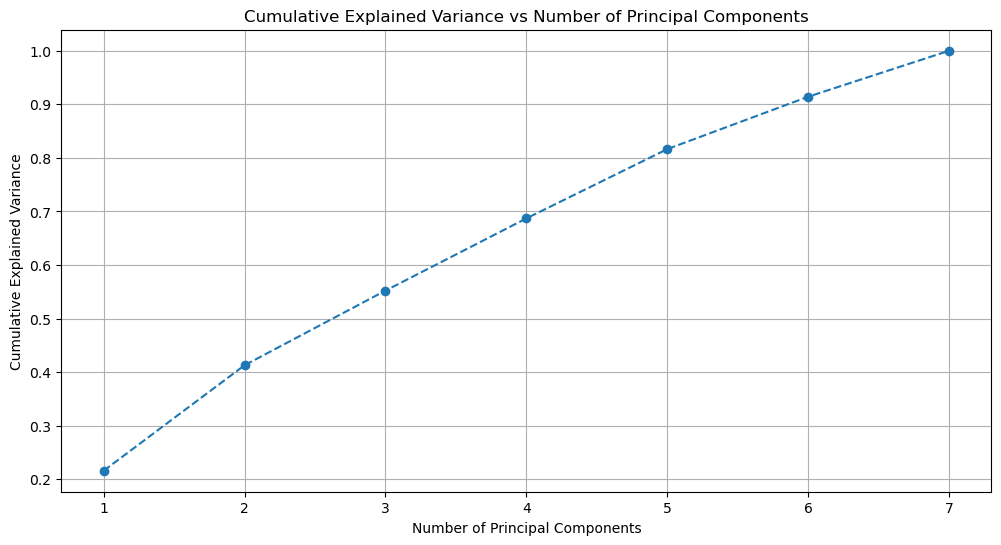

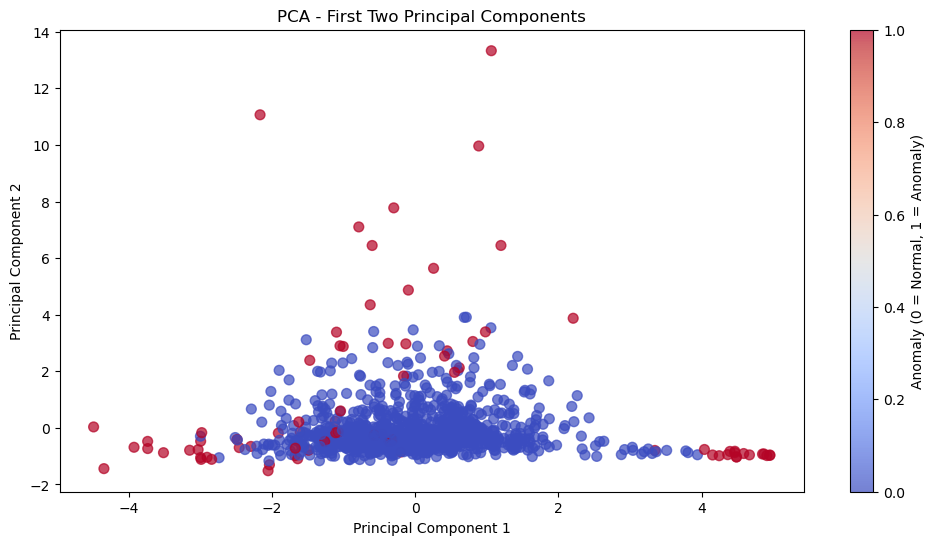

In [181]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=final_df['Anomaly'], cmap='coolwarm', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Anomaly (0 = Normal, 1 = Anomaly)')
plt.show()


In [182]:
# Check the type of scaled_features
print(type(scaled_features))


<class 'numpy.ndarray'>


c:\Users\sakbarpour\AppData\Local\anaconda3\envs\ShaeTFPY\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


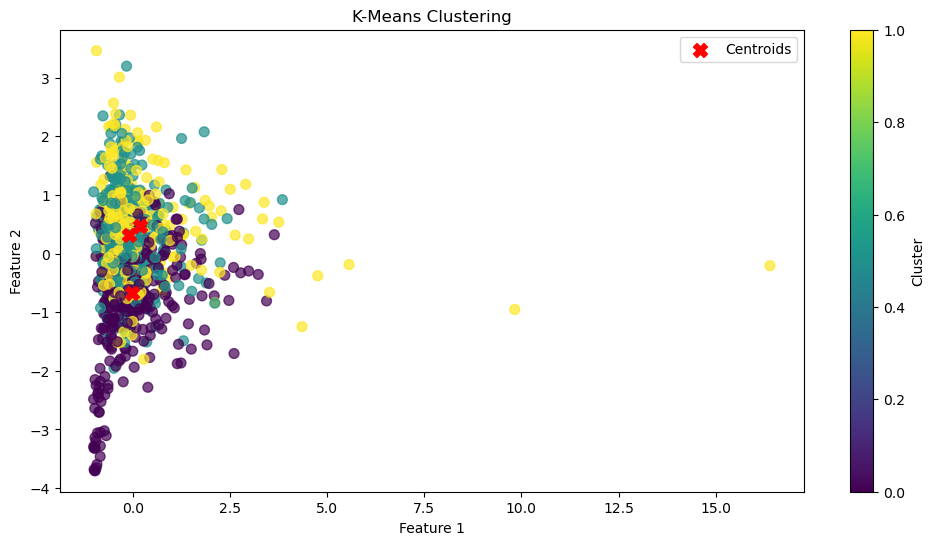

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_clusters = kmeans.fit_predict(scaled_features)

# Add cluster results to DataFrame
final_df['KMeans Cluster'] = kmeans_clusters

# Plot K-Means clusters (2D plot for visualization)
plt.figure(figsize=(12, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [192]:
threshold = 0  # Define an interesting concentration threshold
interesting_signals = final_df[final_df['CTCU'] > threshold]


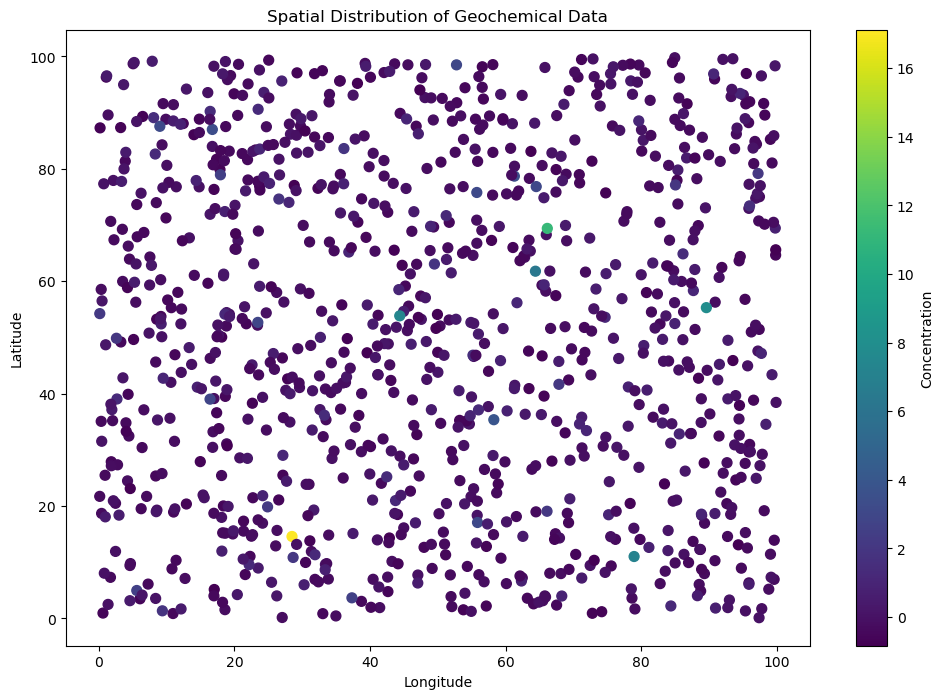

In [193]:
plt.figure(figsize=(12, 8))
plt.scatter(final_df['X'], final_df['Y'], c=final_df['CTCU'], cmap='viridis', s=50)
plt.colorbar(label='Concentration')
plt.title('Spatial Distribution of Geochemical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [195]:
# Normalize/Standardize features
features = data_Geochem[['CTS', 'CTNI', 'CTCU', 'CTNA', 'CTZN', 'CTK', 'CTMG']]
scaled_features = StandardScaler().fit_transform(features)

# Compute Z-scores
z_scores = np.abs(zscore(scaled_features))

# Define a threshold for anomalies
threshold = 3
anomalies = np.any(z_scores > threshold, axis=1)

# Add anomaly results to DataFrame
data_Geochem['Anomaly'] = anomalies

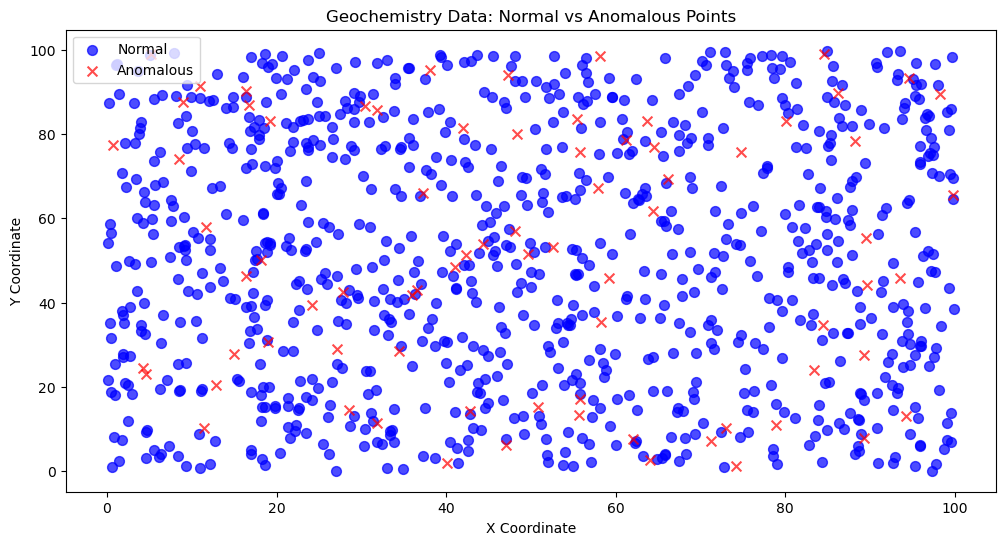

In [196]:
# Plot normal vs anomalous points
plt.figure(figsize=(12, 6))

# Plot normal data
normal_data = data_Geochem[~data_Geochem['Anomaly']]
plt.scatter(normal_data['X'], normal_data['Y'], c='blue', label='Normal', alpha=0.7, s=50)

# Plot anomalous data
anomalous_data = data_Geochem[data_Geochem['Anomaly']]
plt.scatter(anomalous_data['X'], anomalous_data['Y'], c='red', label='Anomalous', alpha=0.7, s=50, marker='x')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Geochemistry Data: Normal vs Anomalous Points')
plt.legend()
plt.show()


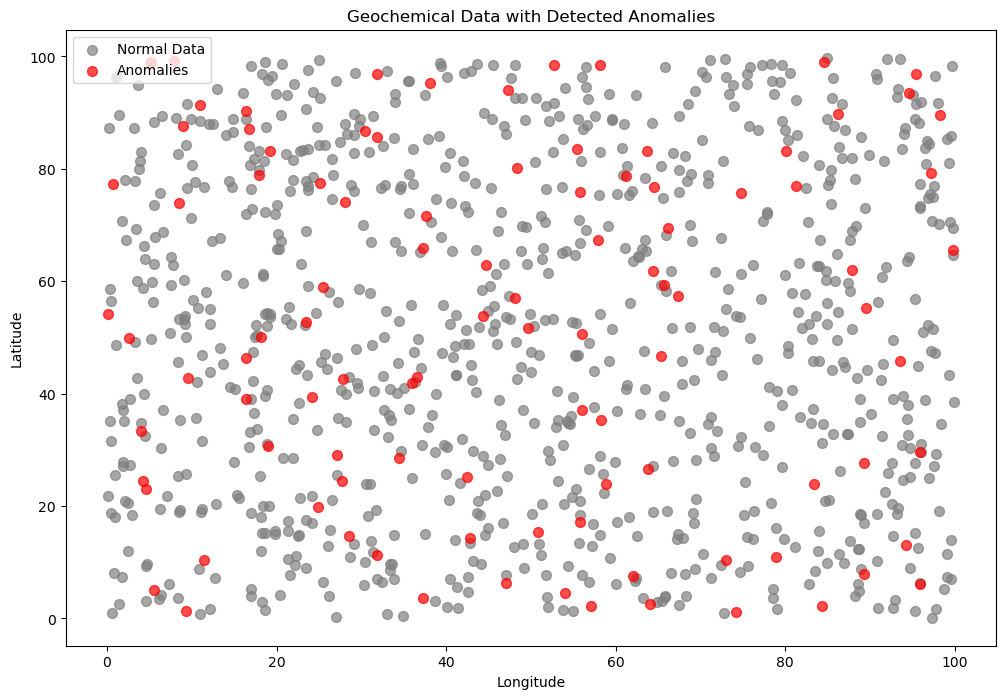

In [198]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# Assuming `data_Geochem` contains all your data including 'X' and 'Y'
# Ensure 'scaled_features' is the normalized/scaled feature data

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed

# Fit the model and predict anomalies
data_Geochem['anomaly'] = iso_forest.fit_predict(scaled_features)

# Separate normal and anomalous data
normal_data = data_Geochem[data_Geochem['anomaly'] == 1]
anomalies_iso = data_Geochem[data_Geochem['anomaly'] == -1]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(normal_data['X'], normal_data['Y'], c='gray', s=50, label='Normal Data', alpha=0.7)
plt.scatter(anomalies_iso['X'], anomalies_iso['Y'], c='red', s=50, label='Anomalies', alpha=0.7)

plt.title('Geochemical Data with Detected Anomalies')
plt.xlabel('Longitude')  # Replace with appropriate x-axis label if needed
plt.ylabel('Latitude')   # Replace with appropriate y-axis label if needed
plt.legend()
plt.show()


c:\Users\sakbarpour\AppData\Local\anaconda3\envs\ShaeTFPY\lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


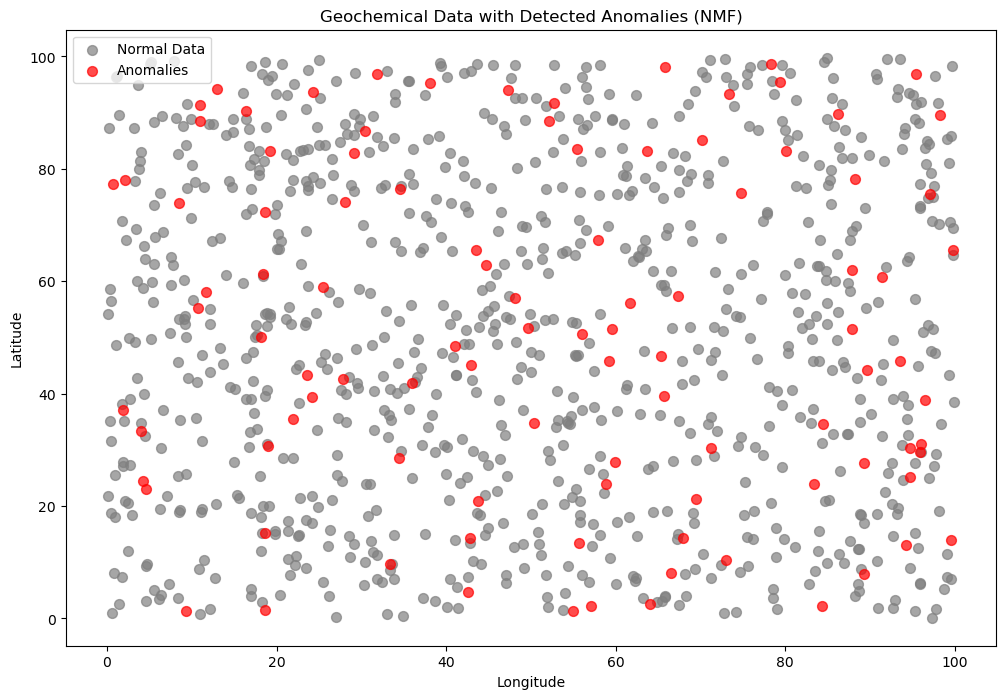

In [200]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_Geochem[['CTS', 'CTNI', 'CTCU', 'CTNA', 'CTZN', 'CTK', 'CTMG']])

# Apply NMF
nmf = NMF(n_components=2, init='random', random_state=42)  # Adjust n_components as needed
nmf_features = nmf.fit_transform(scaled_features)

# Fit Isolation Forest on NMF components
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
anomalies = iso_forest.fit_predict(nmf_features)

# Add anomaly results to the original DataFrame
data_Geochem['anomaly'] = anomalies

# Separate normal and anomalous data
normal_data = data_Geochem[data_Geochem['anomaly'] == 1]
anomalies_iso = data_Geochem[data_Geochem['anomaly'] == -1]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(normal_data['X'], normal_data['Y'], c='gray', s=50, label='Normal Data', alpha=0.7)
plt.scatter(anomalies_iso['X'], anomalies_iso['Y'], c='red', s=50, label='Anomalies', alpha=0.7)

plt.title('Geochemical Data with Detected Anomalies (NMF)')
plt.xlabel('Longitude')  # Adjust if needed
plt.ylabel('Latitude')   # Adjust if needed
plt.legend()
plt.show()

### Possible Questions and Answers

1. **Can you describe your process for analyzing a new geochemistry dataset?**
   - **Answer:** My process starts with exploring the dataset to understand its structure and content. I perform data cleaning to handle missing values, outliers, and inconsistencies. Then, I use exploratory data analysis (EDA) to visualize the data and identify patterns or anomalies. I might use statistical methods or machine learning techniques to further analyze the data and derive insights. Finally, I validate my findings and prepare them for presentation or further analysis.

2. **How do you approach anomaly detection in geochemistry data?**
   - **Answer:** Anomaly detection can be approached using statistical methods or machine learning techniques. For statistical methods, I use techniques like Z-scores or IQR (Interquartile Range) to identify outliers. For machine learning, I might use algorithms such as Isolation Forest, One-Class SVM, or autoencoders. I also visualize anomalies to ensure they make sense in the geological context.

3. **What are some common statistical techniques you use for pattern recognition in geological data?**
   - **Answer:** Common techniques include correlation analysis, regression analysis, and principal component analysis (PCA). Correlation analysis helps identify relationships between variables, regression analysis can model these relationships, and PCA helps reduce dimensionality and identify key features.

4. **How would you handle missing values in a geochemistry dataset?**
   - **Answer:** Missing values can be handled through imputation methods, such as mean, median, or mode imputation. Alternatively, I might use more sophisticated techniques like K-nearest neighbors (KNN) imputation or model-based methods. If the missing values are extensive, I might analyze why the data is missing and consider whether to exclude those variables or observations.

5. **How do you validate your findings when analyzing geological data?**
   - **Answer:** Validation involves cross-referencing findings with known geological theories or results from other studies. I also use statistical validation techniques, such as cross-validation for predictive models, and ensure that results are reproducible and consistent.

6. **Can you give an example of a complex geological problem you’ve solved using data science?**
   - **Answer:** In a previous project, I used machine learning algorithms to predict ore deposits by analyzing hyperspectral data. I applied dimensionality reduction techniques like PCA, followed by clustering methods to group similar data points, and then used classification algorithms to predict the likelihood of ore deposits in various locations.


In [ ]:
### Python Coding Examples

import pandas as pd

# Load dataset
df = pd.read_csv('data.csv')

# Display basic information
print(df.info())
print(df.describe())

# Handle missing values
df.fillna(df.mean(), inplace=True)


In [ ]:
### Anomaly Detection using Isolation Forest:**
from sklearn.ensemble import IsolationForest

# Assume 'data' is a DataFrame with your features
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df)

# -1 indicates anomaly
anomalies = df[df['anomaly'] == -1]

In [ ]:
#Pattern Recognition using PCA:**
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df)

plt.scatter(components[:, 0], components[:, 1])
plt.title('PCA of Geochemistry Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Correlation Analysis:**
correlation_matrix = df.corr()
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Regression Analysis:**
from sklearn.linear_model import LinearRegression

# Assume 'X' is your feature matrix and 'y' is the target variable
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

import matplotlib.pyplot as plt
plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

### Tips for the Interview

- **Understand the Problem:** Make sure you clearly understand the geological problem presented and the context. Ask clarifying questions if needed.
- **Data Preparation:** Be ready to clean and prepare the dataset quickly during the interview.
- **Communicate Your Approach:** Explain your thought process and rationale for choosing specific methods or techniques.
- **Visualizations:** Use visualizations to support your analysis and make your findings clearer.

Good luck with your interview! If you need more specific examples or details, just let me know.